In [538]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from main import hyper_parameter_search
from scipy import special

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


--------- Quadratic Example -----------

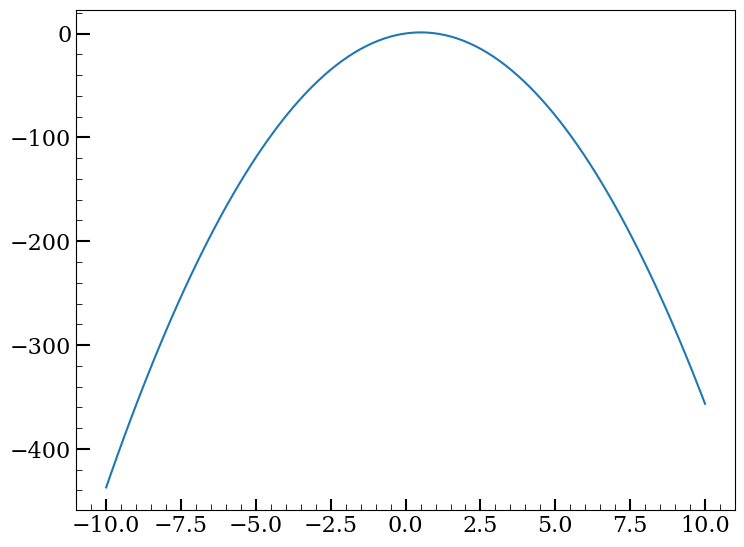

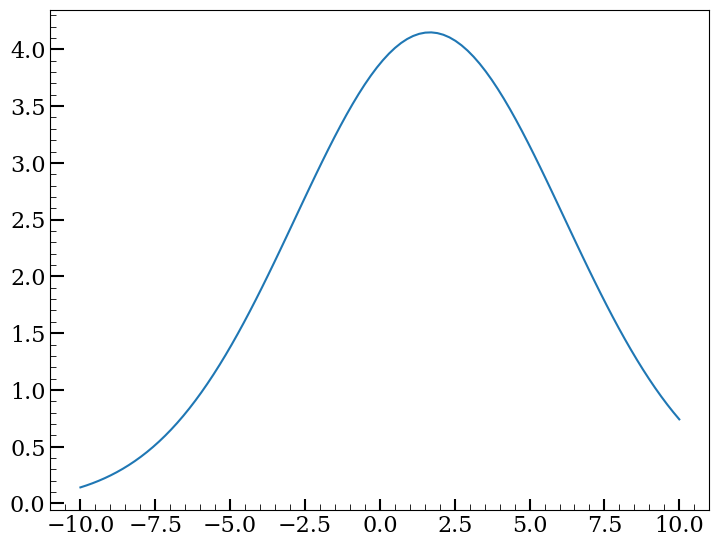

In [539]:
def gaussian_function(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))


def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# def data_generator(function, x_range, num_points, **kwargs):
#     x = np.linspace(x_range[0], x_range[1], num_points)
#     y = function(x, **kwargs)
#     return x, y

def data_generator_quadratic():
    x = np.linspace(-10, 10, 100)


    a, b, c = np.random.uniform(-5, 5, size=3)
    fun = quadratic_function(x, a, b, c)


    return (x, np.asarray(fun)), [a, b, c]


def data_generator_gaussian():
    x = np.linspace(-10, 10, 100)

    a, b, c = np.random.uniform(0.1, 5, size=3)
    fun = gaussian_function(x, a, b, c)

    return (x, np.asarray(fun)), [a, b, c]


x, default = data_generator_quadratic()
x_gaus, default_gaus = data_generator_gaussian()

plt.plot(x[0], x[1])
plt.show()
plt.plot(x_gaus[0], x_gaus[1])
plt.show()

In [540]:
default_args = {
    'allowed_symbols': "pow,add,sub,mul,aq,constant,variable",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}

name = "Quadratic Function Problem"

train, default_coeff_train = data_generator_quadratic()
test, default_coeff_test = data_generator_quadratic()


In [541]:
from main import Problem
Problem_ = Problem(name, train, test, default_args)

<Axes: title={'center': 'Quadratic Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

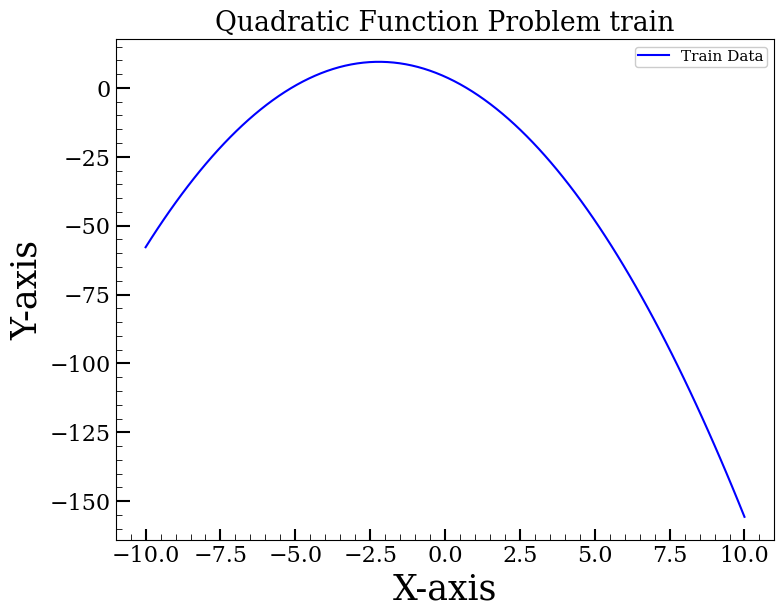

In [542]:
Problem_.plot_data(train=True)

In [543]:
Problem_.solve()

KeyError: 'tournament_size'

<Axes: title={'center': 'Quadratic Function Problem: solution 2 Train'}>

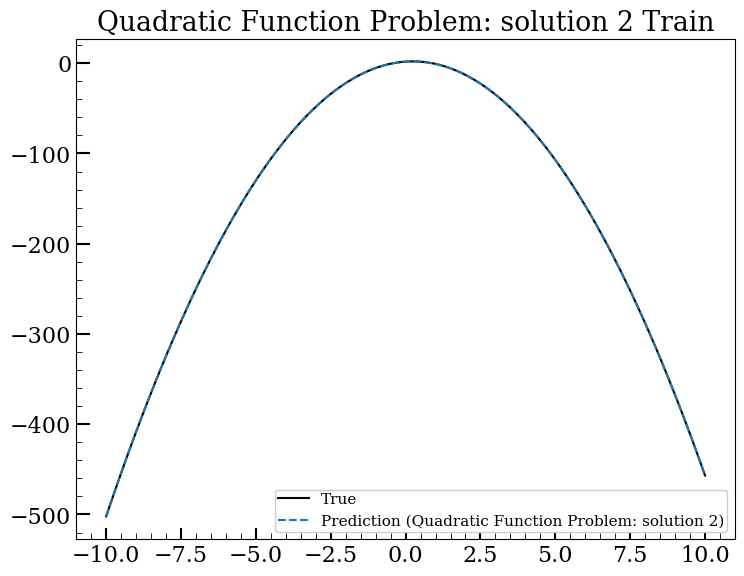

In [ ]:
Problem_.solutions[-1].plot_results()

In [ ]:
Problem_.solutions[-1].display_expression(), Problem_.solutions[2].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('X_{1}^{2}·b_{2} + X_{1}·b_{1} + b_{0}',
  {'b0': 1.800186634064, 'b1': 2.267852442341011, 'b2': -4.812526924369951},
  X1**2*b2 + X1*b1 + b0))

In [ ]:
Problem_.solutions[1].extract_and_format(), Problem_.solutions[1].string_expression

(('X_{1}^{2}·b_{1} + b_{0}',
  {'b0': 1.802358746529, 'b1': -4.812591044737027},
  X1**2*b1 + b0),
 '(1.802358746529 + ((-21.911254882812) * (((-0.538434326649) * X1) * ((-0.407923728228) * X1))))')

<Axes: title={'center': 'Quadratic Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

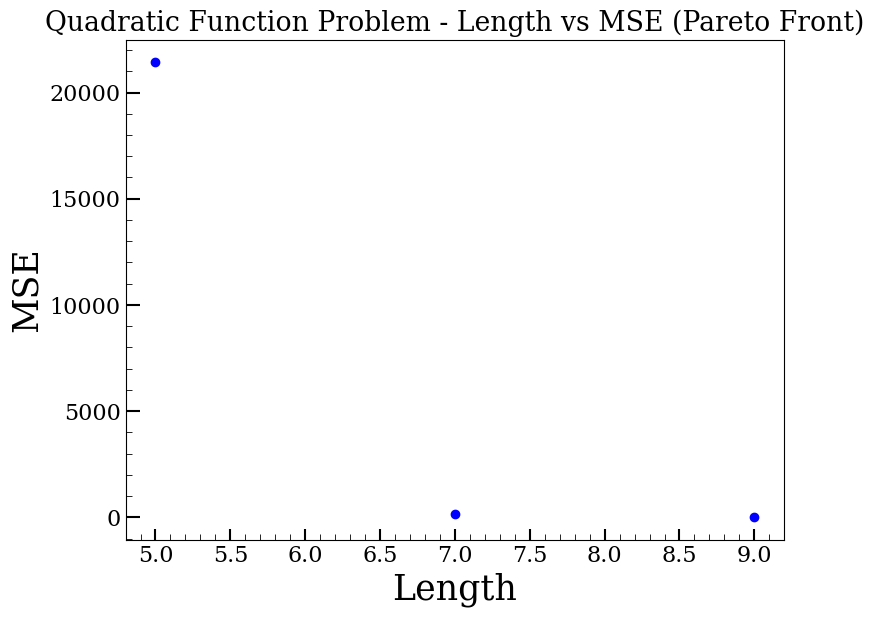

In [ ]:
Problem_.plot_l_vs_mse()

-------- Gaussian Example ----------

In [ ]:
name_g = "Gaussian Function Problem"

gaussian_args = {
    'allowed_symbols': "add,sub,mul,aq,constant,variable,exp",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}


train_g, default_coeff_train_g = data_generator_gaussian()
test_g, default_coeff_test_g = data_generator_gaussian()

Problem_g = Problem(name_g, train_g, test_g, gaussian_args)

<Axes: title={'center': 'Gaussian Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

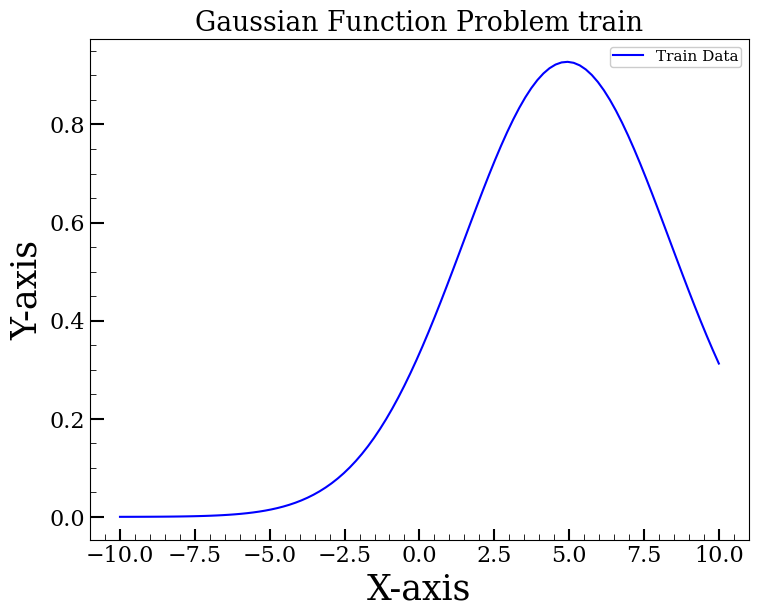

In [ ]:
Problem_g.plot_data(train=True)

In [ ]:
Problem_g.solve()

<Axes: title={'center': 'Gaussian Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

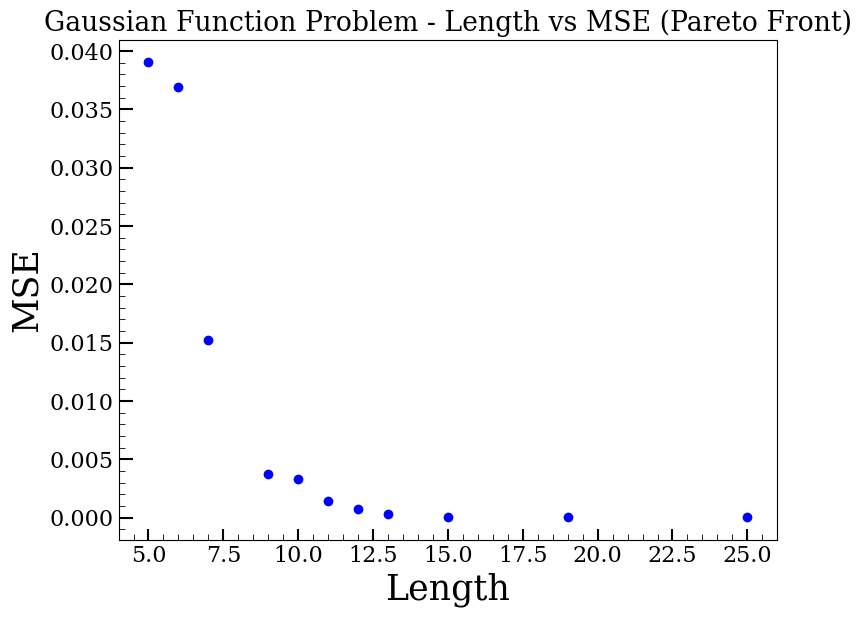

In [ ]:
Problem_g.plot_l_vs_mse()

In [ ]:
n=1
Problem_g.solutions[n].display_expression(), Problem_g.solutions[n].extract_and_format()
#Problem_g.solutions[n].plot_results()

<IPython.core.display.Math object>

(None,
 ('b_{0} + b_{1}·e^{X_{1}·b_{2}}',
  {'b0': 1.427019476891, 'b1': -1.018884420395, 'b2': -0.046727880836},
  b0 + b1*exp(X1*b2)))

<Axes: title={'center': 'Gaussian Function Problem: solution 6 Train'}>

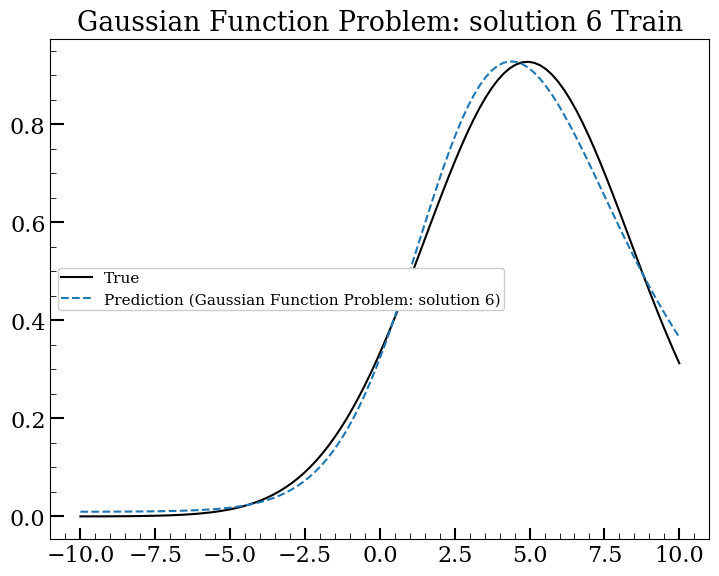

In [ ]:
Problem_g.solutions[6].plot_results()

---------------------------------- Hypergeometrical functions ----------------------------------

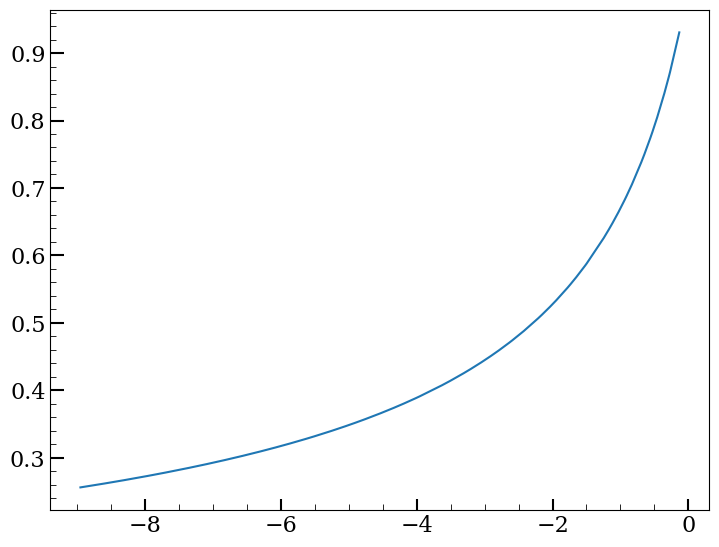

In [ ]:
np.random.seed(42)
x_prime_dstrn_train = np.sort(np.random.uniform(-9.0, -0.016, 200))
x_prime_dstrn_test = np.sort(np.random.uniform(-9.0, -0.016, 200))

target_train = special.hyp2f1(2/3, 1, 7/6, x_prime_dstrn_train)
target_test = special.hyp2f1(2/3, 1, 7/6, x_prime_dstrn_test)

plt.plot(x_prime_dstrn_train, target_train)

In [557]:
# Define problem for SR optimization

hypergeom_args = {
    'allowed_symbols': "add,sub,mul,pow,aq,log,constant,variable",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60000,
    'n_threads': 10,
}

Problem_hypergeom = Problem("Hypergeometric Function Problem", (x_prime_dstrn_train, target_train), (x_prime_dstrn_test, target_test), hypergeom_args)

In [558]:
Problem_hypergeom.solve()
print(f"number of solutions: {len(Problem_hypergeom.solutions)}")

KeyError: 'tournament_size'

<Axes: title={'center': 'Hypergeometric Function Problem: solution 21 Train'}>

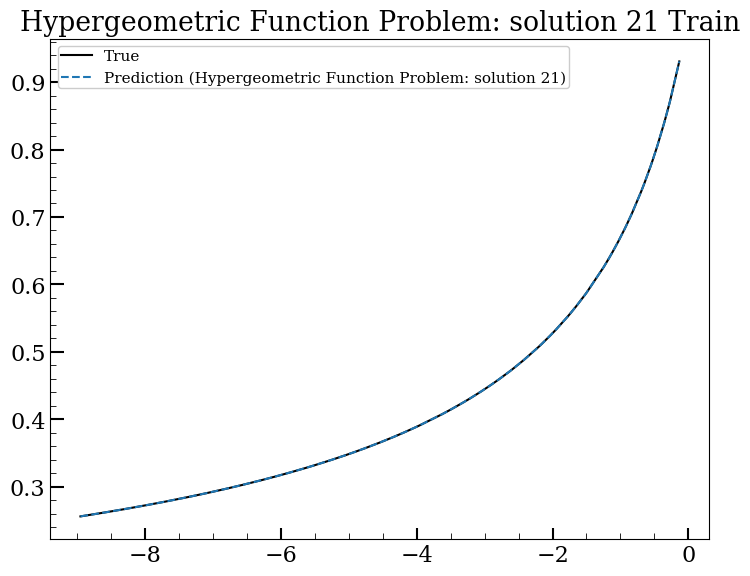

In [552]:
Problem_hypergeom.solutions[-1].plot_results()

<Axes: title={'center': 'Fractional error: Hypergeometric Function Problem: solution 5'}, xlabel='-x', ylabel='Fractional Error'>

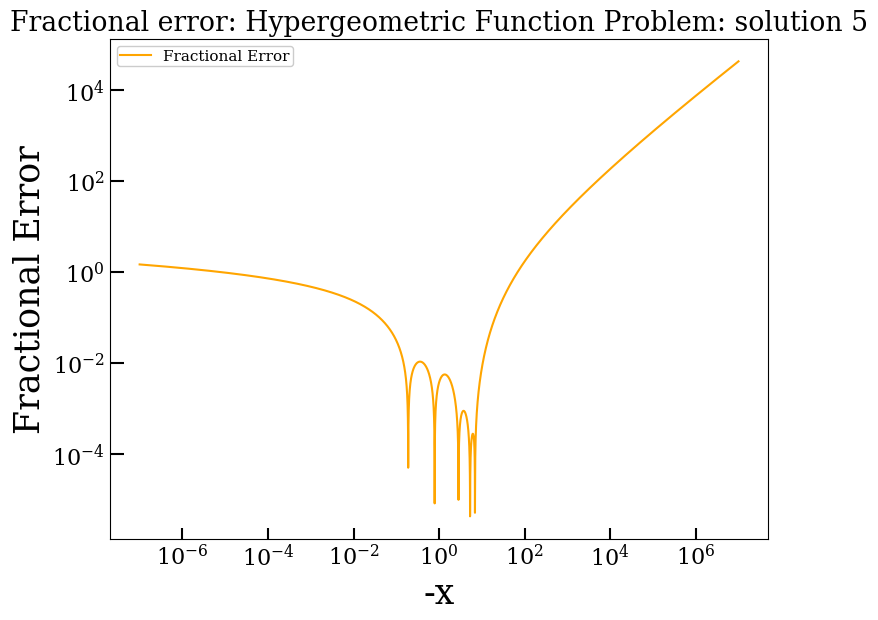

In [553]:
x_val = -1.0 * np.geomspace(10**(-7),10**7, 10000)
Problem_hypergeom.solutions[5].plot_fractional_error_hypergeom(x_val)

<Axes: title={'center': 'Hypergeometric Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

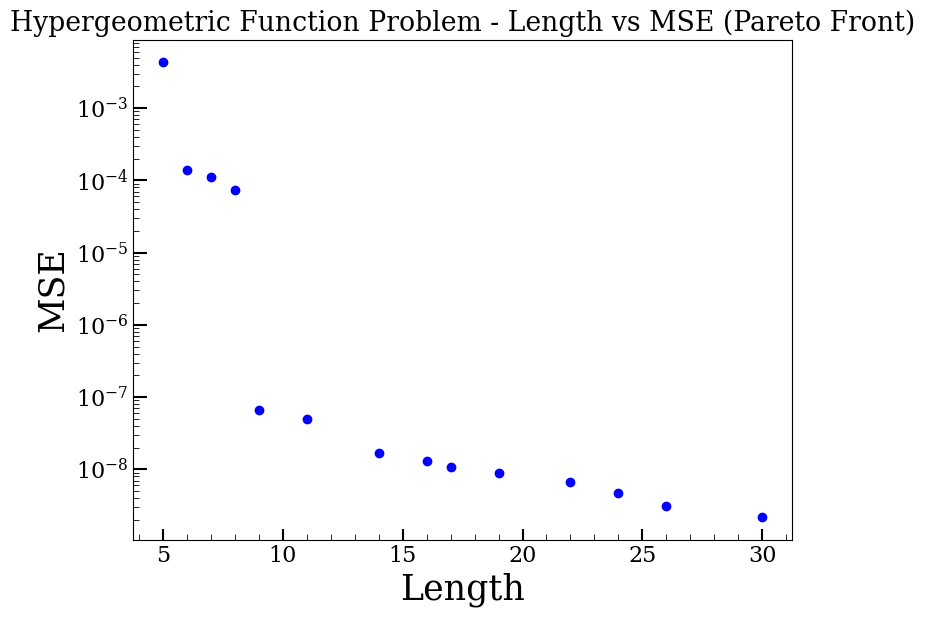

In [ ]:
Problem_hypergeom.plot_l_vs_mse()

In [ ]:
k=-1
Problem_hypergeom.solutions[k].display_expression(), Problem_hypergeom.solutions[k].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('b_{0} + \\frac{b_{1}}{\\sqrt{b_{2}·\\left(- X_{1}\\right)^{b_{3}} + 1}·\\sqrt{\\frac{b_{4}}{\\log{\\left(\\log{\\left(X_{1}·b_{6} + b_{5} \\right)} \\right)}^{2} + 1} + 1}·\\sqrt{\\frac{b_{13}}{\\sqrt{\\frac{b_{11}·\\log{\\left(- X_{1} \\right)}}{b_{9}^{X_{1}·b_{10}}·\\left(- X_{1}\\right)^{X_{1}·b_{10}} + 1} + \\frac{b_{12}·\\log{\\left(- X_{1} \\right)}^{2}}{b_{9}^{X_{1}·b_{10}}·\\left(- X_{1}\\right)^{X_{1}·b_{10}} + 1} + \\frac{b_{8}}{b_{9}^{X_{1}·b_{10}}·\\left(- X_{1}\\right)^{X_{1}·b_{10}} + 1} + 1}} + \\frac{b_{4}}{\\frac{b_{11}·\\log{\\left(- X_{1} \\right)}}{b_{9}^{X_{1}·b_{10}}·\\left(- X_{1}\\right)^{X_{1}·b_{10}} + 1} + \\frac{b_{12}·\\log{\\left(- X_{1} \\right)}^{2}}{b_{9}^{X_{1}·b_{10}}·\\left(- X_{1}\\right)^{X_{1}·b_{10}} + 1} + \\frac{b_{8}}{b_{9}^{X_{1}·b_{10}}·\\left(- X_{1}\\right)^{X_{1}·b_{10}} + 1} + 1} + b_{7}}}',
  {'b0': -0.03742197156,
   'b1': 1.0338198981566482,
   'b2': 1.1159476265059751,
   'b3': 1.055507659912,
   'b4': 0.0022969958650220913

In [ ]:
Problem_hypergeom.export_solutions_to_latex(n=10)

LaTeX file written to latex_files/Hypergeometric_Function_Problemno_solutions_10/solutions.tex
